
<br>

# this problem is from: tensorflow_documentation: 

## [prb_link](https://www.tensorflow.org/tutorials/keras/classification)

<br>

In [98]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [99]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.activations import relu,softmax
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

In [100]:
mnist_dataset = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = mnist_dataset.load_data()

print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train : (60000, 28, 28)
y_train : (60000,)
X_test : (10000, 28, 28)
y_test: (10000,)


In [101]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

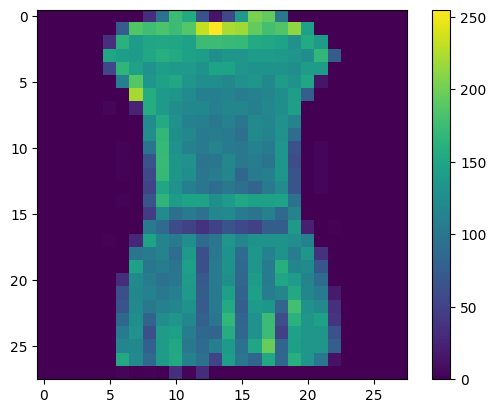

In [102]:
plt.imshow(X_train[3])
plt.colorbar()

# this image range pixel value range from (0,250) bt  pixel value consist of (0,255) so we need to scale the data 

In [103]:
X_train = X_train/255.0
X_test = X_test/255.0

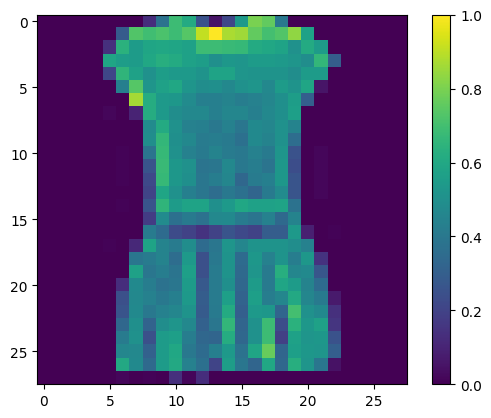

In [104]:
plt.imshow(X_train[3])
plt.colorbar()


In [105]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

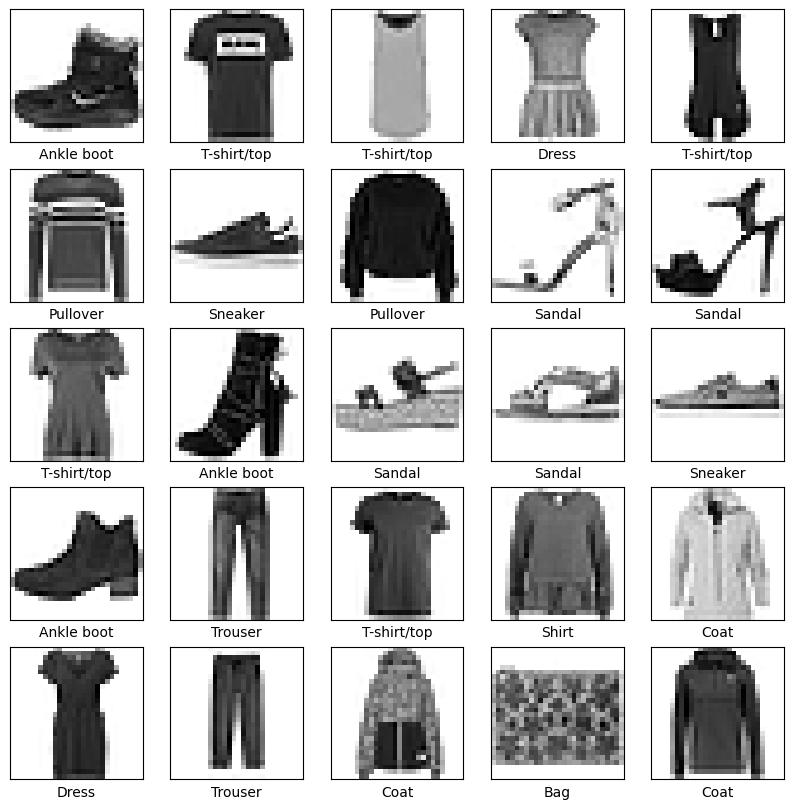

In [106]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [107]:
model = Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128,activation=relu))
model.add(Dense(64,activation=relu))
model.add(Dense(10,activation=softmax))

/home/yasin/allProgram/100DaysDL/tensorflow_documentation/venvML/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [110]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10


/home/yasin/allProgram/100DaysDL/tensorflow_documentation/venvML/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7693 - loss: 0.6678 - val_accuracy: 0.8526 - val_loss: 0.4004
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8593 - loss: 0.3909 - val_accuracy: 0.8585 - val_loss: 0.3783
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8703 - loss: 0.3496 - val_accuracy: 0.8631 - val_loss: 0.3778
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8827 - loss: 0.3158 - val_accuracy: 0.8704 - val_loss: 0.3510
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8864 - loss: 0.3019 - val_accuracy: 0.8846 - val_loss: 0.3226
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8931 - loss: 0.2850 - val_accuracy: 0.8742 - val_loss: 0.3468
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8995 - loss: 0.2658 - val_accuracy: 0.8851 - val_loss: 0.3209
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9032 - loss: 0.2584 - val_accura

In [120]:
X_test.shape

(10000, 28, 28)

In [121]:
y_test.shape

(10000,)

In [111]:
test_loss, test_accu = model.evaluate(X_test,y_test) # verbose = 0 no traning output show

test_accu*100

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.3505


88.30000162124634

In [112]:
predic = model.predict(X_test) # predic for all image:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [113]:
# see the first image:
predic[0]

array([1.6554588e-05, 1.7779773e-06, 5.9308405e-07, 1.5407853e-05,
       1.4210390e-05, 2.7399827e-04, 3.2858504e-06, 3.2183765e-03,
       5.0258455e-09, 9.9645573e-01], dtype=float32)

In [114]:
np.argmax(predic[0]) # give me the heigest index value

9

In [115]:
y_train[0] # see what we have in our train data 

9

<br>

### define function for prediction : 

<br>

In [127]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

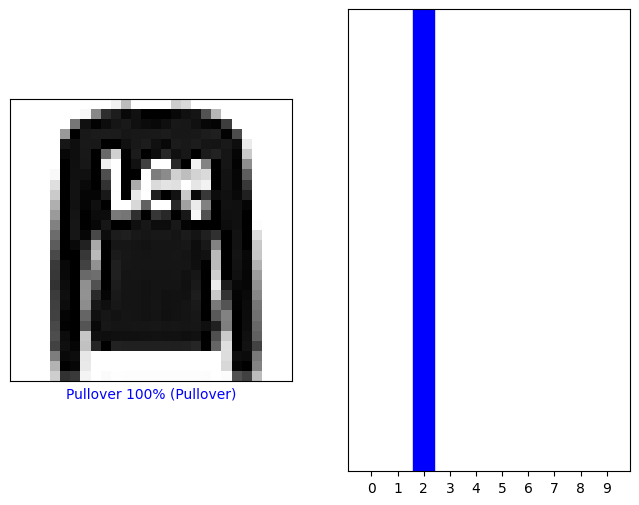

In [133]:
i = 1
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_image(i,predic[i],y_test,X_test)
plt.subplot(1,2,2)
plot_value_array(i,predic[i],y_test)



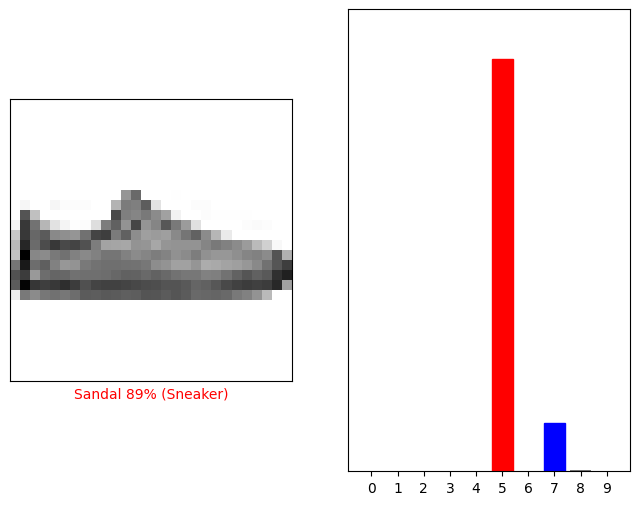

In [132]:
i = 12
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_image(i,predic[i],y_test,X_test)
plt.subplot(1,2,2)
plot_value_array(i,predic[i],y_test)


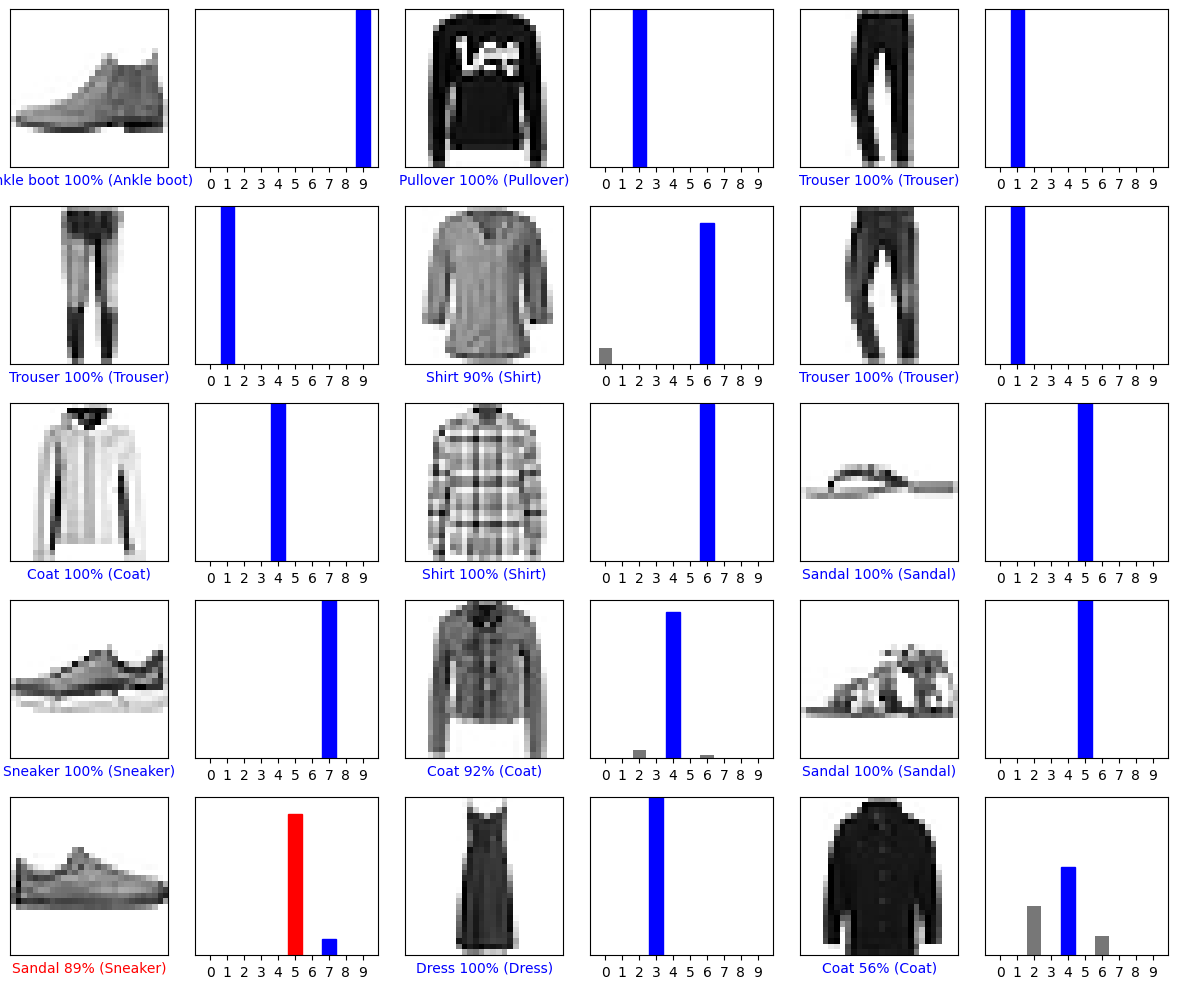

In [134]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predic[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predic[i], y_test)
plt.tight_layout()
plt.show()